In [46]:
#!pip install ultralytics

In [47]:
# Import necessary libraries
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [48]:
# Directory Paths
base_dir = '/content/drive/MyDrive/projects/BoneFracture/yolo/yoloDataSet'  # Modified to match your directory name
yaml_path = os.path.join(base_dir, 'data.yaml')  # Assuming existing YAML file
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
# Load existing YAML configuration
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

 # Get dataset directories from YAML
train_dir = config['train']
val_dir = config['val']
test_dir = config['test']

Dataset Distribution:
Train set: 1530 images
Val set: 23 images
Test set: 53 images


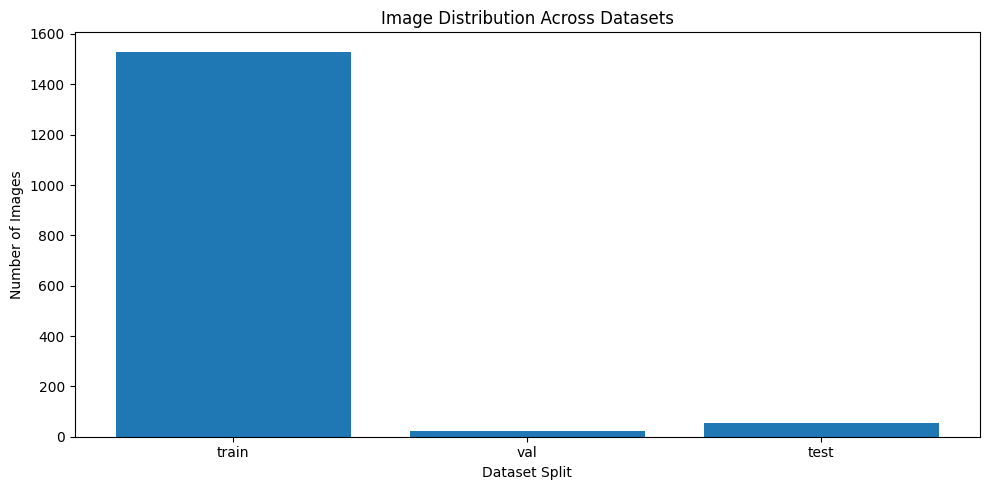

{'train': 1530, 'val': 23, 'test': 53}


In [49]:
# Data Counts
# Count and visualize the distribution of images across different splits
dataset_counts = {
    'train': len(os.listdir(os.path.join(train_dir))),
    'val': len(os.listdir(os.path.join(val_dir))),
    'test': len(os.listdir(os.path.join(test_dir)))
}

print("Dataset Distribution:")
for split, count in dataset_counts.items():
    print(f"{split.capitalize()} set: {count} images")

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(dataset_counts.keys(), dataset_counts.values())
plt.title('Image Distribution Across Datasets')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

print(dataset_counts)



In [50]:
# Model creation

# Use YOLOv8 nano for efficiency (can change to other variants)
model = YOLO('yolov8n.pt')  # Pre-trained on COCO dataset
print(model)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [52]:
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    plots=True,
    save_period=10,
    project=os.path.join('/content/drive/MyDrive/projects/BoneFracture/yolo', 'runs'),
    name='yolo_bone_fracture_detection',
    exist_ok=True  # Allows overwriting existing runs
)


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/projects/BoneFracture/yolo/yoloDataSet/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=/content/drive/MyDrive/projects/BoneFracture/yolo/runs, name=yolo_bone_fracture_detection, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /content/drive/MyDrive/projects/BoneFracture/yolo/yoloDataSet/train/labels.cache... 1530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1530/1530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/projects/BoneFracture/yolo/yoloDataSet/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.47G     0.3331     0.4718       1.01         28        640: 100%|██████████| 96/96 [00:45<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         23         23      0.936       0.87      0.923      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.35G     0.3914     0.4756      1.045         34        640: 100%|██████████| 96/96 [00:43<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         23         23          1      0.944      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.35G     0.3892     0.4174       1.04         31        640: 100%|██████████| 96/96 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         23         23     0.0163      0.087     0.0159    0.00376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.35G     0.3707     0.3632      1.029         35        640: 100%|██████████| 96/96 [00:44<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         23         23      0.884      0.913      0.981      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.35G     0.3636     0.3373       1.03         32        640: 100%|██████████| 96/96 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23         23      0.891      0.957      0.949      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.35G     0.3399     0.3019      1.016         33        640: 100%|██████████| 96/96 [00:39<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23         23      0.874      0.906      0.922      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.34G      0.334     0.2852      1.014         35        640: 100%|██████████| 96/96 [00:40<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23         23       0.99          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.35G     0.3247     0.2765      1.011         32        640: 100%|██████████| 96/96 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         23         23      0.878      0.938      0.973      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.34G     0.3178     0.2546     0.9954         36        640: 100%|██████████| 96/96 [00:45<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         23         23      0.884      0.999      0.976      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.35G     0.3087     0.2507      1.003         29        640: 100%|██████████| 96/96 [00:42<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         23         23      0.996      0.913      0.948      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G     0.3094     0.2494     0.9976         40        640: 100%|██████████| 96/96 [00:42<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         23         23       0.95          1       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.35G     0.3147      0.255      1.002         36        640: 100%|██████████| 96/96 [00:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         23         23      0.931      0.913      0.977      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.35G     0.3051     0.2355     0.9885         35        640: 100%|██████████| 96/96 [00:41<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23         23      0.998          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.35G     0.2956     0.2313     0.9901         33        640: 100%|██████████| 96/96 [00:39<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         23         23      0.958      0.995      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.34G     0.2952      0.227     0.9871         40        640: 100%|██████████| 96/96 [00:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         23         23      0.996          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.35G      0.287     0.2213     0.9837         39        640: 100%|██████████| 96/96 [00:40<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         23         23      0.995          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.35G     0.2807      0.218     0.9766         36        640: 100%|██████████| 96/96 [00:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         23         23      0.949          1      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.35G     0.2854      0.218     0.9858         36        640: 100%|██████████| 96/96 [00:41<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         23         23      0.956          1      0.988      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.35G     0.2711     0.2083     0.9771         37        640: 100%|██████████| 96/96 [00:42<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         23         23      0.996          1      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.35G     0.2677     0.2081     0.9771         26        640: 100%|██████████| 96/96 [00:40<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         23         23      0.993          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.35G       0.27     0.2115     0.9826         35        640: 100%|██████████| 96/96 [00:46<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         23         23      0.996          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.35G     0.2683     0.2053     0.9729         38        640: 100%|██████████| 96/96 [00:40<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         23         23      0.996          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.35G     0.2556     0.1958     0.9734         32        640: 100%|██████████| 96/96 [00:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         23         23      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.35G     0.2588     0.1935     0.9736         33        640: 100%|██████████| 96/96 [00:39<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         23         23      0.997          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.35G     0.2504     0.1911     0.9699         36        640: 100%|██████████| 96/96 [00:40<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         23         23      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.35G     0.2505     0.1864      0.974         38        640: 100%|██████████| 96/96 [00:46<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         23         23      0.958      0.957      0.958      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.35G     0.2554     0.1895     0.9747         38        640: 100%|██████████| 96/96 [00:40<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         23         23      0.997          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.35G     0.2573     0.1889      0.973         37        640: 100%|██████████| 96/96 [00:41<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         23         23      0.957          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.35G     0.2549     0.1841     0.9702         38        640: 100%|██████████| 96/96 [00:41<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         23         23      0.997          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.35G     0.2505     0.1797     0.9706         33        640: 100%|██████████| 96/96 [00:43<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         23         23      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.35G     0.2464     0.1789       0.97         35        640: 100%|██████████| 96/96 [00:41<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         23         23      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.34G     0.2434     0.1726     0.9606         38        640: 100%|██████████| 96/96 [00:41<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         23         23      0.997          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.35G     0.2422     0.1768     0.9653         38        640: 100%|██████████| 96/96 [00:40<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         23         23      0.995          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.35G     0.2411     0.1712      0.963         40        640: 100%|██████████| 96/96 [00:41<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         23         23      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.35G     0.2375     0.1722     0.9621         38        640: 100%|██████████| 96/96 [00:41<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         23         23      0.936      0.957       0.95      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.35G     0.2372     0.1708      0.964         36        640: 100%|██████████| 96/96 [00:41<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         23         23      0.955          1      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.35G     0.2382     0.1697     0.9615         36        640: 100%|██████████| 96/96 [00:41<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         23         23       0.99          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.35G     0.2332     0.1659     0.9609         33        640: 100%|██████████| 96/96 [00:45<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         23         23      0.996          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.35G      0.236     0.1646     0.9638         36        640: 100%|██████████| 96/96 [00:39<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         23         23      0.991          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.35G     0.2306     0.1605     0.9607         38        640: 100%|██████████| 96/96 [00:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23         23      0.997          1      0.995      0.974


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.34G     0.1304     0.2955     0.9803         10        640: 100%|██████████| 96/96 [00:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         23         23      0.992          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.34G     0.1144    0.09807      0.958         10        640: 100%|██████████| 96/96 [00:39<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         23         23      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.34G     0.1046    0.08657     0.9555         10        640: 100%|██████████| 96/96 [00:45<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         23         23      0.998          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.35G     0.1018     0.0793     0.9514         10        640: 100%|██████████| 96/96 [00:36<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         23         23      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.35G     0.1017    0.07747     0.9492         10        640: 100%|██████████| 96/96 [00:38<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         23         23      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.34G    0.09812    0.07285     0.9522         10        640: 100%|██████████| 96/96 [00:45<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         23         23          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.34G    0.09531    0.06895     0.9515         10        640: 100%|██████████| 96/96 [00:44<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         23         23      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.35G    0.09704    0.07155     0.9459         10        640: 100%|██████████| 96/96 [00:42<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         23         23      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.35G    0.09165    0.06689     0.9448         10        640: 100%|██████████| 96/96 [00:48<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         23         23          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.34G     0.0908     0.0654     0.9505         10        640: 100%|██████████| 96/96 [00:38<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         23         23          1          1      0.995      0.995



50 epochs completed in 0.610 hours.
Optimizer stripped from /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


                   all         23         23          1          1      0.995      0.995
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection


In [53]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78845c8fe170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [54]:
# Validation metrics
metrics = model.val(
        data=yaml_path,
        plots=True
      )

print(metrics)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/projects/BoneFracture/yolo/yoloDataSet/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         23         23          1          1      0.995      0.995
Speed: 0.3ms preprocess, 5.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/MyDrive/projects/BoneFracture/yolo/runs/yolo_bone_fracture_detection
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7883fdee9c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028

In [56]:
print(results.results_dict.keys())


dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


<Figure size 1500x500 with 0 Axes>

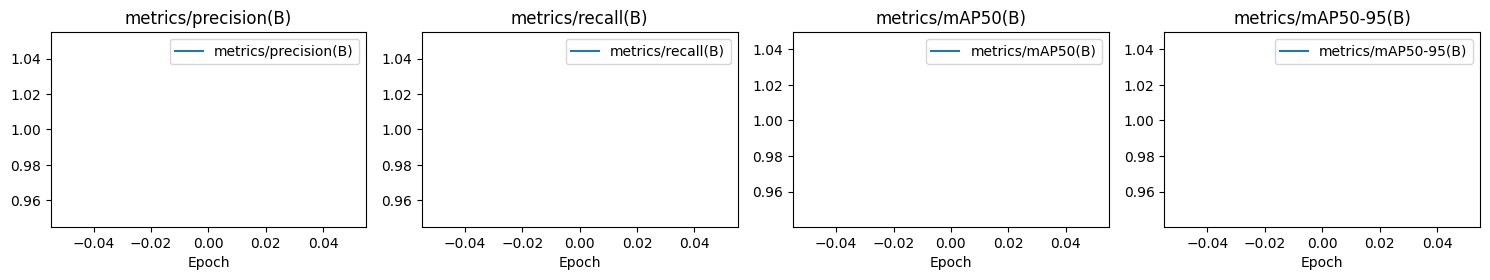

In [57]:
# Visualize training metrics

# Plot training metrics
plt.figure(figsize=(15, 5))

# Metrics to plot
# Updated list of metrics
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# Plot training metrics
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    plt.plot(results.results_dict[metric], label=metric)
    plt.title(metric)
    plt.xlabel('Epoch')
    plt.legend()

plt.tight_layout()
plt.show()


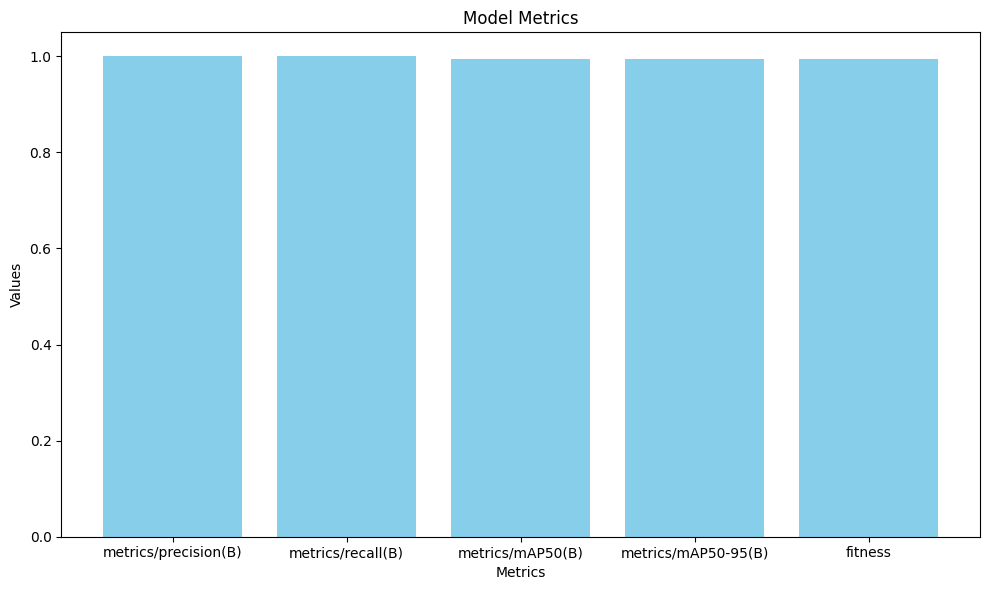

In [60]:
import matplotlib.pyplot as plt

# Metrics available in the results_dict
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness']

# Values for each metric
values = [results.results_dict[metric] for metric in metrics]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')

# Adding labels and title
plt.title('Model Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#inference
def detect_fractures(image_path, model_path=None):
    """
    Detect fractures in a new image

    Args:
        image_path (str): Path to the input image
        model_path (str, optional): Path to the trained model

    Returns:
        list: Detected fracture results
    """
    # Use the last trained model if no specific model is provided
    if model_path is None:
        model_path = os.path.join(base_dir, 'best_bone_fracture_yolov8.pt')

    model = YOLO(model_path)
    results = model(image_path)

    return results